Reference dataset used from original Kaggle competition:  https://www.kaggle.com/sercanyesiloz/red-wine-quality-eda-classification#Models

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from collections import Counter

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 10.8MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=12cc239ed607bd438eed5c395890b2760fc4282c54f0a4b5ecf1e01b6f6d0782
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


#Explainable AI using LIME to explain individual predictions in Machine Learning applications.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Task #1
# Data Exploration and understanding (vinequaliy-red.csv)**bold text**

In [74]:
df=pd.read_csv("/content/winequality-red.csv")

In [75]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))

Rows, columns: (1599, 12)


In [76]:
# Now were in a position to view the first five rows of the dataset and get a gist of this columns and we can get our head around the data.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [77]:
# Now were in a position to view the first five rows of the dataset and get a gist of this columns.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
# Let's check for missing values
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Task #2
# Transformation into a classification problem and dataset


In [ ]:
# Lets separate the indepent variable from the dependent variables.
# y independent variable will be the quality of the red wind, which we are interested in making preidctions
# X dependent variables, remaining columns

In [ ]:
X_feature_names = [i for i in df.columns if df[i].dtype in [np.float]]

In [ ]:
print(X_feature_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [ ]:
Y_feature_names = [i for i in df.columns if df[i].dtype in [np.int64]]

In [ ]:
print(Y_feature_names)

['quality']


In [ ]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

In [ ]:
#Let's turn this into a classification of good wines and bad wines

In [ ]:
# We now need to separate out the feature variables (dependent) and target variable
X = df.drop(['quality', 'goodquality'], axis = 1) # Dependent variables
y = df['goodquality'] # Newly created target variable (Independent variable)

In [ ]:
# Let's look at the proporation of good vs bad wines
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

# Task #3
# Preparing the data for training, validation purposes and estimate the performance of three models 


In [ ]:
# Before we train or develop our model, let's normalize our dependent values first, to get better results. 
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X) # run the StandardScalar function to normalize all the data

In [ ]:
# Then we can split the data into training and test data sets. 

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = .25, random_state = 0)

In [ ]:
print(y_test.value_counts()) # As we can see 400 rows have been picked for validation purposes and 45 of those data rows do have red vines classified as good quality

0    355
1     45
Name: goodquality, dtype: int64


# Task #4
# Train, validate, estimate and contrast the performance of three regression classifiers

In [ ]:
# Let's start with a decision tree classifier, so we need a few resources to get started
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Let's create a few variables to store the results of our classifier 
model1 = DecisionTreeClassifier

In [ ]:
# Let's create a few variables to store the results of our trained classifier
model1 = DecisionTreeClassifier(random_state = 1)
model1.fit(X_train, y_train) # Fit the model based on the values X_train, y_train
y_pred1 = model1.predict(X_test)  # Instantiate variables to make predicitons based on X_test values

In [ ]:
# Let's compare the predicted values with the test data
print(classification_report (y_test, y_pred1)) #y_test actual values, y_pred1 predicted values

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



In [ ]:
# Let's try a random forest classifier 
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state = 1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [ ]:
print(classification_report (y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



In [ ]:
# Let's try a Ada Boost Classifiter
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state = 1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [ ]:
print(classification_report (y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



# Task #5
# Prepare and train the LIME explainer

In [ ]:
# Reference:  https://towardsdatascience.com/understanding-model-predictions-with-lime-a582fdff3a3b
# Paper Reference: https://arxiv.org/abs/1602.04938
import lime
import lime.lime_tabular


In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                    feature_names = X_feature_names, 
                    class_names = ['goodquality'],
                    # categorical_features = ['goodquality'],
                    # There is no categorical features in this examples, otherwise 
                    verbose = True, mode = 'regression')

In [ ]:
# We need to not train the LIME explainer
print(y_test)

1109    0
1032    0
1002    1
487     0
979     0
       ..
489     0
362     0
526     0
442     1
1229    0
Name: goodquality, Length: 400, dtype: int64


In [ ]:
# Let's isolate the first three rown of the data
print(y_test)

1109    0
1032    0
1002    1
487     0
979     0
       ..
489     0
362     0
526     0
442     1
1229    0
Name: goodquality, Length: 400, dtype: int64


In [ ]:
# Now what are the actual values being predicted from our fist model, the decision tree classifieer 
print(model1.predict(X_test[0:3]))
# So we can see it's identical to our test data

[0 0 1]


In [ ]:
print(y_test[20:25])

1177    1
549     0
1341    0
1235    0
191     0
Name: goodquality, dtype: int64


In [ ]:
print(model2.predict(X_test[20:25]))

# Task 6
# Explaining Individual Predictions for our data set

In [ ]:
exp = explainer.explain_instance(X_test[20], model3.predict) #20 row of model #3.  
# Reference reading;  https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/

Intercept 0.009511948276407285
Prediction_local [0.23243187]
Right: 0


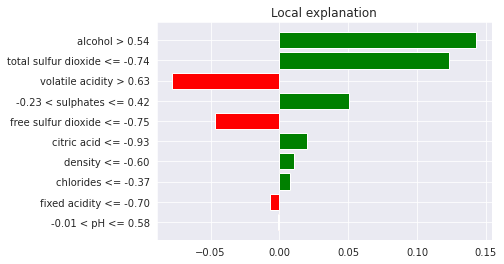

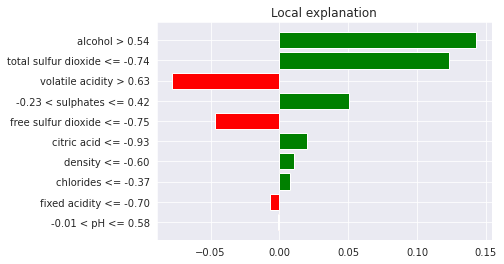

In [ ]:
# Let's graphically display these results
exp.as_pyplot_figure()

In [ ]:
# Verify first three rows of data
print(y_test[0:3])

1109    0
1032    0
1002    1
Name: goodquality, dtype: int64


In [ ]:
# So let see if our 
print(model2.predict(X_test[0:3]))

[0 0 1]


In [ ]:
# So let see if our prediction are accurate
print(model2.predict(X_test[0:3]))

[0 0 1]


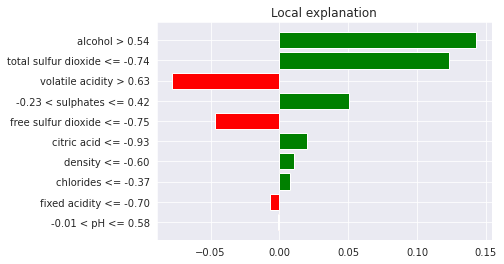

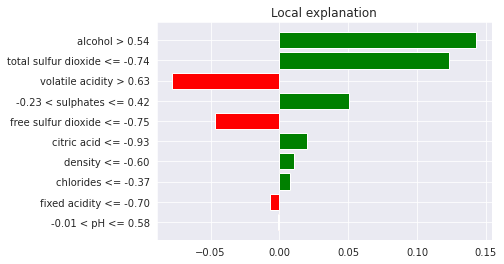

In [ ]:
exp.as_pyplot_figure()